In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr

In [2]:
import pickle
from sklearn.ensemble import RandomForestRegressor

In [3]:
k_sep_norm = pd.read_csv("../storage/k-sep_normalized.tsv",sep="\t")  #protein
ecfp4 = pd.read_csv("../storage/ECFP4.tsv",sep="\t")  #compound

In [4]:
sgtembeds = pd.read_csv('sgt_embeds.csv', index_col='Unnamed: 0')
sgtembeds.head()

,target_id,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
0,P06213,0.215062,0.203091,0.180683,0.198066,0.171366,0.188681,0.193831,0.172092,0.199483,...,0.068085,0.187856,0.169934,0.198071,0.190562,0.177598,0.187509,0.198230,0.196648,0.192867
1,P78368,0.079285,0.004321,0.236577,0.213020,0.004000,0.244418,0.089572,0.252362,0.208389,...,0.240204,0.223962,0.030206,0.220780,0.230988,0.080210,0.206182,0.247487,0.095402,0.217688
2,Q9H2K8,0.202843,0.078705,0.204041,0.194296,0.071651,0.214227,0.203855,0.206597,0.179541,...,0.073583,0.198795,0.011310,0.182349,0.214013,0.192200,0.026675,0.010142,0.257809,0.211540
3,P49336,0.207967,0.237654,0.230337,0.223728,0.214036,0.204381,0.084948,0.222819,0.199139,...,0.225932,0.085967,0.215828,0.221116,0.215934,0.221184,0.223420,0.029879,0.004575,0.010838
4,Q6DT37,0.188301,0.187365,0.179571,0.192665,0.183457,0.190285,0.174676,0.185862,0.192370,...,0.028361,0.073716,0.173434,0.177409,0.062972,0.068286,0.197220,0.194040,0.001428,0.206309


In [5]:
#train dataset
df_tr = pd.read_csv("../storage/traincomps.tsv",sep="\t")

In [6]:
#train dataset with protein-compound feature vectors
pssm = df_tr.merge(k_sep_norm,on="target_id").merge(ecfp4,on="compound_id")
sgt = df_tr.merge(sgtembeds,on="target_id").merge(ecfp4,on="compound_id")

In [7]:
pssm.head()

,compound_id,target_id,pchembl_value,k_separated_bigrams_pssm0,k_separated_bigrams_pssm1,k_separated_bigrams_pssm2,k_separated_bigrams_pssm3,k_separated_bigrams_pssm4,k_separated_bigrams_pssm5,k_separated_bigrams_pssm6,...,ECFP4.1015,ECFP4.1016,ECFP4.1017,ECFP4.1018,ECFP4.1019,ECFP4.1020,ECFP4.1021,ECFP4.1022,ECFP4.1023,ECFP4.1024
0,CHEMBL1000,Q02763,4.05,0.132645,0.246746,0.191735,0.210505,0.210938,0.130516,0.154157,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL103667,Q02763,7.70,0.132645,0.246746,0.191735,0.210505,0.210938,0.130516,0.154157,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL103667,P12931,4.46,0.062425,0.136338,0.085795,0.097171,0.050512,0.078817,0.086594,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL103667,P35968,5.50,0.108654,0.241820,0.227927,0.240146,0.144558,0.159763,0.186377,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL103667,P09619,5.96,0.098823,0.214194,0.193479,0.199802,0.115261,0.139842,0.162413,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pssm.shape

(87769, 1427)

In [9]:
print(sgt.shape)
sgt.head()

(87769, 1427)


,compound_id,target_id,pchembl_value,0,1,2,3,4,5,6,...,ECFP4.1015,ECFP4.1016,ECFP4.1017,ECFP4.1018,ECFP4.1019,ECFP4.1020,ECFP4.1021,ECFP4.1022,ECFP4.1023,ECFP4.1024
0,CHEMBL1000,Q02763,4.05,0.192822,0.211333,0.194378,0.193421,0.212838,0.198222,0.073880,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL103667,Q02763,7.70,0.192822,0.211333,0.194378,0.193421,0.212838,0.198222,0.073880,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL103667,P12931,4.46,0.221785,0.076431,0.218826,0.207455,0.224760,0.206100,0.216464,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL103667,P35968,5.50,0.195055,0.197929,0.179309,0.160953,0.203582,0.184688,0.073640,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL103667,P09619,5.96,0.176590,0.211499,0.188480,0.206389,0.201014,0.189005,0.206246,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# # keep some as test set
# pstrain, sgtrain = pssm.iloc[:60000,:], sgt.iloc[:60000,:]
# pstest, sgtest = pssm.iloc[60000:,:], sgt.iloc[60000:,:]
# pstrain.shape, pstest.shape, sgtrain.shape, sgtest.shape

((60000, 1427), (27769, 1427), (60000, 1427), (27769, 1427))

# MLP Regressor

In [10]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.neural_network import MLPRegressor


In [11]:
import os, sys, math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)

In [19]:
def MLP_predictor(encoder, ax, name, predict):

    reg = MLPRegressor(hidden_layer_sizes=(20), alpha=0.01, max_iter=500,
                        activation='relu', solver='lbfgs', random_state=2)
    #print (len(df))
    X = encoder.drop(['compound_id', 'target_id', 'pchembl_value'], axis=1)
    y = encoder['pchembl_value']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg.fit(X_train, y_train)
    pred = list(reg.predict(X_test))
    truth = y_test.tolist()
    
    dfdict = {'True Value': truth, 'Predicted Value': pred}
    df = pd.DataFrame(dfdict)
    predict[name[i]] = df
    df.plot('True Value', "Predicted Value" ,kind='scatter',s=20, ax=ax, color="blue", alpha=0.5)
    ax.plot((0,10), (0,10), ls="--", lw=2, c=".2", color='red')
    ax.set_xlim((2,10));  ax.set_ylim((2,10))
    pcorr = pearsonr(df['True Value'], df['Predicted Value'])[0]
    mse = mean_squared_error(df['True Value'], df['Predicted Value'])
    ax.set_title(name[i])
    ax.text(9,2.5,'pcorr=%s' %round(pcorr,2),style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    ax.text(9,3.5,'mse=%s' %round(mse,2), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    sns.despine()

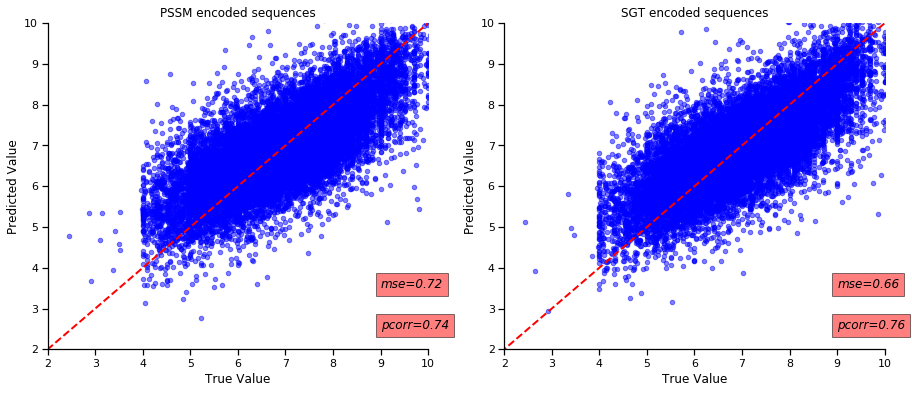

In [20]:
MLP_predict = {}
sns.set_context('notebook')
encs=[pssm, sgt]
fig,axs=plt.subplots(1,2,figsize=(15,6))
axs=axs.flat
i=0
for enc in encs:
    MLP_predictor(enc,ax=axs[i], name = ['PSSM encoded sequences','SGT encoded sequences'], predict= MLP_predict)
    i+=1

## Ensemble model

In [64]:
from xgboost import XGBRegressor

In [106]:
def ensemble_predictor(encoder, ax, name, predict):

    reg = XGBRegressor(objective="reg:linear")

    #print (len(df))
    X = encoder.drop(['compound_id', 'target_id', 'pchembl_value'], axis=1)
    y = encoder['pchembl_value']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
    pred = list(reg.predict(X_test))
    truth = y_test.tolist()
    dfdict = {'truth': truth, 'predictions': pred}
    df = pd.DataFrame(dfdict)
    
    predict[name[i]] = df
    df.plot('truth', "predictions" ,kind='scatter',s=20, ax=ax)
    ax.plot((0,10), (0,10), ls="--", lw=2, c=".2")
    ax.set_xlim((2,10));  ax.set_ylim((2,10))
    pcorr = pearsonr(df['truth'], df['predictions'])[0]
    mse = mean_squared_error(df['truth'], df['predictions'])
    ax.set_title(name[i])
    ax.text(3,9,'pcorr=%s' %round(pcorr,2))
    ax.text(3,10,'mse=%s' %round(mse,2))
    sns.despine()

[23:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.87059
[1]	validation_0-rmse:5.30658
[2]	validation_0-rmse:4.80086
[3]	validation_0-rmse:4.34809
[4]	validation_0-rmse:3.94326
[5]	validation_0-rmse:3.58175
[6]	validation_0-rmse:3.25915
[7]	validation_0-rmse:2.97245
[8]	validation_0-rmse:2.71791
[9]	validation_0-rmse:2.49177
[10]	validation_0-rmse:2.29264
[11]	validation_0-rmse:2.11738
[12]	validation_0-rmse:1.96301
[13]	validation_0-rmse:1.82842
[14]	validation_0-rmse:1.71144
[15]	validation_0-rmse:1.60966
[16]	validation_0-rmse:1.52149
[17]	validation_0-rmse:1.44707
[18]	validation_0-rmse:1.38328
[19]	validation_0-rmse:1.32877
[20]	validation_0-rmse:1.28258
[21]	validation_0-rmse:1.24299
[22]	validation_0-rmse:1.21064
[23]	validation_0-rmse:1.18231
[24]	validation_0-rmse:1.15869
[25]	validation_0-rmse:1.13855
[26]	validation_0-rmse:1.12153
[27]	validation_0-rmse:1.10824
[28]	validation

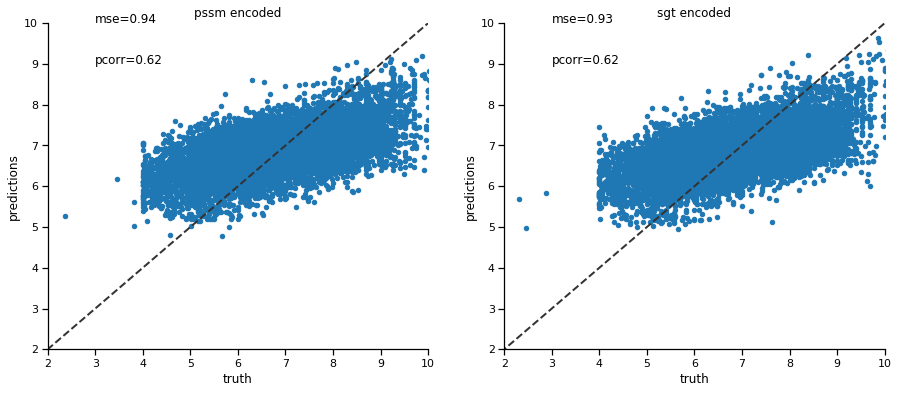

In [107]:
ensemble_predict = {}
sns.set_context('notebook')
encs=[pstrain, sgtrain]
fig,axs=plt.subplots(1,2,figsize=(15,6))
axs=axs.flat
i=0
for enc in encs:
    ensemble_predictor(enc,ax=axs[i], name = ['pssm encoded','sgt encoded'], predict= ensemble_predict)
    i+=1

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
def rf_predictor(encoder, ax, name, predict):

    reg = RandomForestRegressor(n_estimators=100,max_features=0.33,random_state=42)

    #print (len(df))
    X = encoder.drop(['compound_id', 'target_id', 'pchembl_value'], axis=1)
    y = encoder['pchembl_value']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg.fit(X_train, y_train)
    pred = list(reg.predict(X_test))
    truth = y_test.tolist()
    
    dfdict = {'True Value': truth, 'Predicted Value': pred}
    df = pd.DataFrame(dfdict)
    predict[name[i]] = df
    df.plot('True Value', "Predicted Value" ,kind='scatter',s=20, ax=ax, color="blue", alpha=0.5)
    ax.plot((0,10), (0,10), ls="--", lw=2, c=".2", color='red')
    ax.set_xlim((2,10));  ax.set_ylim((2,10))
    pcorr = pearsonr(df['True Value'], df['Predicted Value'])[0]
    mse = mean_squared_error(df['True Value'], df['Predicted Value'])
    ax.set_title(name[i])
    ax.text(9,2.5,'pcorr=%s' %round(pcorr,2),style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    ax.text(9,3.5,'mse=%s' %round(mse,2), style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
    sns.despine()

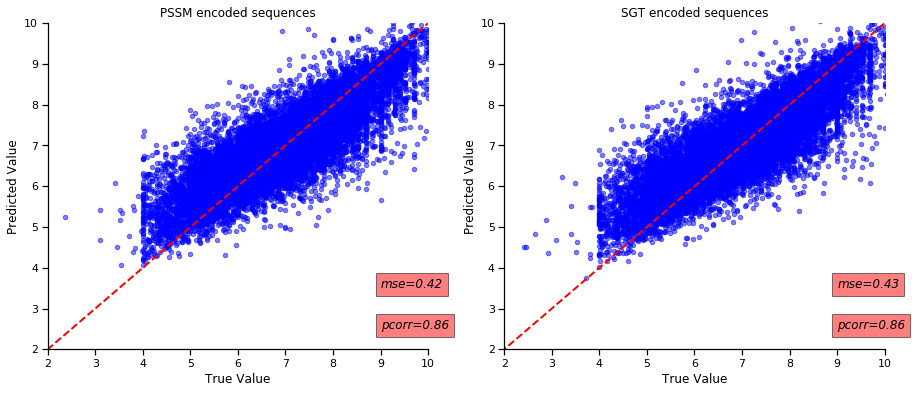

In [22]:
rf_predict = {}
sns.set_context('notebook')
encs=[pssm, sgt]
fig,axs=plt.subplots(1,2,figsize=(15,6))
axs=axs.flat
i=0
for enc in encs:
    rf_predictor(enc,ax=axs[i], name = ['PSSM encoded sequences','SGT encoded sequences'], predict= rf_predict)
    i+=1